# opecv-face-detection

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="opecv-face-detection")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kap58627/opecv-face-detection" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kap58627/opecv-face-detection


'https://jovian.ai/kap58627/opecv-face-detection'

In [1]:
#!pip install opencv-python
import time 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test1 = cv2.imread('test1.jpg')
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

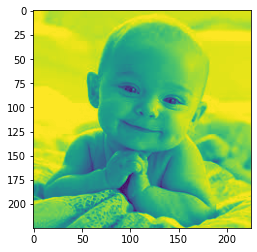

In [12]:
#cv2.imshow('Test1 Image', gray_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(gray_img)

In [3]:
#loading haarcascadecascade classifier training file 
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [4]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


In [5]:
#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [9]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

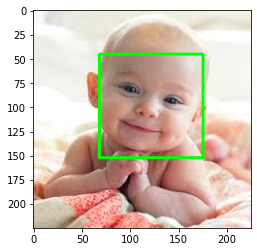

In [10]:
#conver image to RGB and show image
plt.imshow(convertToRGB(test1))

In [13]:
# Execute this to save new versions of the notebook
jovian.commit(project="opecv-face-detection")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kap58627/opecv-face-detection" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kap58627/opecv-face-detection


'https://jovian.ai/kap58627/opecv-face-detection'

In [16]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

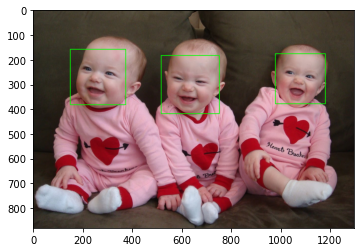

In [18]:
#load another image
test2 = cv2.imread('test3.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

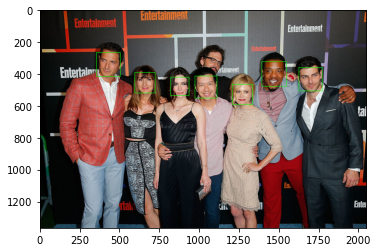

In [19]:
#load another image
test2 = cv2.imread('test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

One face unidentified

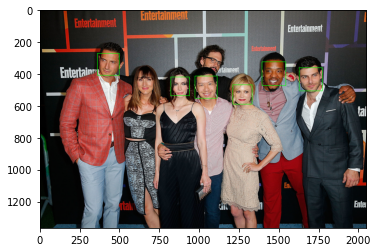

In [20]:
#load another image
test2 = cv2.imread('test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor=1.2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

In [ ]:
hmm.. now two unidentified face

# LBP Cascade Classifier

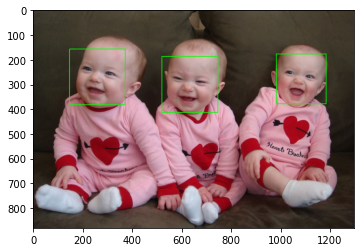

In [22]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

#load test image
test2 = cv2.imread('test3.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

In [24]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

#load test image1
test1 = cv2.imread('test5.jpg')
#load test image2
test2 = cv2.imread('test6.jpg')

In [29]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

In [30]:
#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

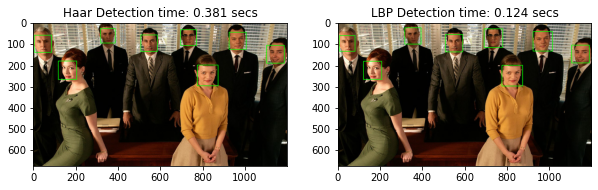

In [31]:
#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)

- **Accuracy:** Both `Haar` and `LBP` detected faces successfully.
- **Speed:** `LBP` was faster than `Haar`.

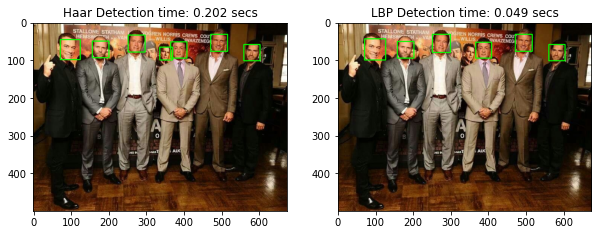

In [32]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)

**Accuracy: Haar detected more faces and than LBP.
**Speed: LBP was significantly faster than Haar.

In [35]:
# Execute this to save new versions of the notebook
jovian.commit(project="opecv-face-detection")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kap58627/opecv-face-detection" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kap58627/opecv-face-detection


'https://jovian.ai/kap58627/opecv-face-detection'